In [1]:
import tensorflow as tf
from tensorflow.keras import datasets

In [2]:
# MNIST (손글씨)
data = datasets.mnist
(train_x, train_y), (test_x, test_y) = data.load_data()

In [3]:
type(train_x)

numpy.ndarray

In [4]:
train_x.shape

(60000, 28, 28)

In [5]:
train_x[0].shape

(28, 28)

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

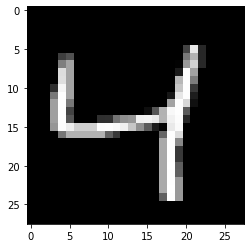

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_x[2], 'gray')
plt.show()

In [8]:
train_y[0]

5

In [9]:
# 검증데이터 분리
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, random_state=10)

In [10]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((45000, 28, 28), (15000, 28, 28), (45000,), (15000,))

In [11]:
train_y[:10]

array([8, 7, 9, 8, 0, 5, 8, 6, 2, 1], dtype=uint8)

In [12]:
28*28

784

In [13]:
# 모델에 입력하기 위해 차원 변경
# 스케일 조정(MinMax) 색상범위값 255로 나눔
train_x = train_x.reshape(train_x.shape[0],28*28)/255
valid_x = valid_x.reshape(valid_x.shape[0],28*28)/255
test_x = test_x.reshape(test_x.shape[0],28*28)/255

In [14]:
train_x.shape, valid_x.shape, test_x.shape

((45000, 784), (15000, 784), (10000, 784))

In [15]:
train_y[:10]

array([8, 7, 9, 8, 0, 5, 8, 6, 2, 1], dtype=uint8)

In [16]:
# label(정답)의 categorical값 -> 원핫인코딩
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
valid_y = to_categorical(valid_y)
test_y = to_categorical(test_y)

In [17]:
train_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

### 신경망(ANN) 구현

In [21]:
# import
from tensorflow.keras.models import Sequential # 모델객체생성을 위한 클래스
from tensorflow.keras.layers import Dense # 레이어추가를 위한 클래스

In [26]:
# 랜덤시드값
tf.random.set_seed(14)

# 모델 구현
model = Sequential() # 객체 생성

# 데이터 입력받는 레이어
# Dense(출력데이터차원, 활성화함수, 입력데이터차원)
model.add(Dense(64, activation='relu', input_shape=(28*28,)))

# 레이어 추가
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

# 출력레이어
# label 값의 종류만큼 차원 지정
# 활성화함수 -> softmax
model.add(Dense(10, activation='softmax'))

# 모델 설정
# compile()
# 최적화기법 : adam(learning_rate=0.001)
# 손실함수 : categorical_crossentropy
# 평가지표 : accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습
# epochs : 학습횟수
# validation_data : 검증데이터
model.fit(train_x, train_y, epochs=10, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/10
900/900 [==============================] - 2s 2ms/step - loss: 0.7399 - accuracy: 0.7676 - val_loss: 0.2280 - val_accuracy: 0.9325
Epoch 2/10
900/900 [==============================] - 1s 2ms/step - loss: 0.1830 - accuracy: 0.9466 - val_loss: 0.1642 - val_accuracy: 0.9515
Epoch 3/10
900/900 [==============================] - 1s 1ms/step - loss: 0.1230 - accuracy: 0.9622 - val_loss: 0.1392 - val_accuracy: 0.9580
Epoch 4/10
900/900 [==============================] - 1s 1ms/step - loss: 0.1016 - accuracy: 0.9693 - val_loss: 0.1322 - val_accuracy: 0.9608
Epoch 5/10
900/900 [==============================] - 1s 1ms/step - loss: 0.0822 - accuracy: 0.9748 - val_loss: 0.1268 - val_accuracy: 0.9625
Epoch 6/10
900/900 [==============================] - 2s 2ms/step - loss: 0.0697 - accuracy: 0.9781 - val_loss: 0.1178 - val_accuracy: 0.9670
Epoch 7/10
900/900 [==============================] - 1s 1ms/step - loss: 0.0574 - accuracy: 0.9822 - val_loss: 0.1202 - val_accuracy: 0.9677
Epoch 

In [27]:
# 테스트데이터 평가
# 손실값, 정확도
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 1ms/step - loss: 0.1129 - accuracy: 0.9703


[0.11291469633579254, 0.970300018787384]

In [28]:
 for func in ['sigmoid','tanh','relu']:
    # 랜덤시드값
    tf.random.set_seed(14)

    # 모델 구현
    model = Sequential() # 객체 생성

    # 데이터 입력받는 레이어
    # Dense(출력데이터차원, 활성화함수, 입력데이터차원)
    model.add(Dense(64, activation=func, input_shape=(28*28,)))

    # 레이어 추가
    model.add(Dense(32, activation=func))
    model.add(Dense(32, activation=func))
    model.add(Dense(32, activation=func))

    # 출력레이어
    # label 값의 종류만큼 차원 지정
    # 활성화함수 -> softmax
    model.add(Dense(10, activation='softmax'))

    # 모델 설정
    # compile()
    # 최적화기법 : adam(learning_rate=0.001)
    # 손실함수 : categorical_crossentropy
    # 평가지표 : accuracy
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 학습
    # epochs : 학습횟수
    # validation_data : 검증데이터
    model.fit(train_x, train_y, epochs=10, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/10
900/900 [==============================] - 2s 2ms/step - loss: 1.8944 - accuracy: 0.3853 - val_loss: 0.6804 - val_accuracy: 0.8628
Epoch 2/10
900/900 [==============================] - 1s 2ms/step - loss: 0.5534 - accuracy: 0.8858 - val_loss: 0.3447 - val_accuracy: 0.9198
Epoch 3/10
900/900 [==============================] - 1s 1ms/step - loss: 0.3095 - accuracy: 0.9282 - val_loss: 0.2683 - val_accuracy: 0.9327
Epoch 4/10
900/900 [==============================] - 1s 1ms/step - loss: 0.2349 - accuracy: 0.9449 - val_loss: 0.2255 - val_accuracy: 0.9415
Epoch 5/10
900/900 [==============================] - 1s 2ms/step - loss: 0.1978 - accuracy: 0.9518 - val_loss: 0.2044 - val_accuracy: 0.9454
Epoch 6/10
900/900 [==============================] - 2s 2ms/step - loss: 0.1620 - accuracy: 0.9592 - val_loss: 0.1849 - val_accuracy: 0.9507
Epoch 7/10
900/900 [==============================] - 1s 1ms/step - loss: 0.1344 - accuracy: 0.9655 - val_loss: 0.1753 - val_accuracy: 0.9526
Epoch 

### softmax 함수

In [29]:
# softmax 함수
tf.nn.softmax([0.1,0.2,0.5])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.27800977, 0.30724832, 0.41474187], dtype=float32)>

In [30]:
tf.nn.softmax([0.1,0.2,0.5]).numpy()

array([0.27800977, 0.30724832, 0.41474187], dtype=float32)

In [31]:
tf.nn.softmax([0.1,0.2,0.5]).numpy().sum()

1.0

### 모델 설정(compile)

In [34]:
# import (optimizer 클래스)
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

for opt in [Adam(), SGD(), RMSprop()]:
    # 랜덤시드값
    tf.random.set_seed(14)

    # 모델 구현
    model = Sequential() # 객체 생성

    # 데이터 입력받는 레이어
    # Dense(출력데이터차원, 활성화함수, 입력데이터차원)
    model.add(Dense(64, activation='relu', input_shape=(28*28,)))

    # 레이어 추가
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))

    # 출력레이어
    # label 값의 종류만큼 차원 지정
    # 활성화함수 -> softmax
    model.add(Dense(10, activation='softmax'))

    # 모델 설정
    # compile()
    # 최적화기법 : adam(learning_rate=0.001)
    # 손실함수 : categorical_crossentropy
    # 평가지표 : accuracy
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # 학습
    # epochs : 학습횟수
    # validation_data : 검증데이터
    model.fit(train_x, train_y, epochs=10, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/10
900/900 [==============================] - 2s 2ms/step - loss: 0.7399 - accuracy: 0.7676 - val_loss: 0.2280 - val_accuracy: 0.9325
Epoch 2/10
900/900 [==============================] - 1s 1ms/step - loss: 0.1830 - accuracy: 0.9466 - val_loss: 0.1642 - val_accuracy: 0.9515
Epoch 3/10
900/900 [==============================] - 1s 1ms/step - loss: 0.1230 - accuracy: 0.9622 - val_loss: 0.1392 - val_accuracy: 0.9580
Epoch 4/10
900/900 [==============================] - 1s 1ms/step - loss: 0.1016 - accuracy: 0.9693 - val_loss: 0.1322 - val_accuracy: 0.9608
Epoch 5/10
900/900 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9748 - val_loss: 0.1268 - val_accuracy: 0.9625
Epoch 6/10
900/900 [==============================] - 1s 1ms/step - loss: 0.0697 - accuracy: 0.9781 - val_loss: 0.1178 - val_accuracy: 0.9670
Epoch 7/10
900/900 [==============================] - 1s 2ms/step - loss: 0.0574 - accuracy: 0.9822 - val_loss: 0.1202 - val_accuracy: 0.9677
Epoch 

### 성능평가

In [35]:
# 랜덤시드값
tf.random.set_seed(14)

# 모델 구현
model = Sequential() # 객체 생성

# 데이터 입력받는 레이어
# Dense(출력데이터차원, 활성화함수, 입력데이터차원)
model.add(Dense(64, activation='relu', input_shape=(28*28,)))

# 레이어 추가
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

# 출력레이어
# label 값의 종류만큼 차원 지정
# 활성화함수 -> softmax
model.add(Dense(10, activation='softmax'))

# 모델 설정
# compile()
# 최적화기법 : adam(learning_rate=0.001)
# 손실함수 : categorical_crossentropy
# 평가지표 : accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습
# epochs : 학습횟수
# validation_data : 검증데이터
history = model.fit(train_x, train_y, epochs=50, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/50
900/900 [==============================] - 2s 2ms/step - loss: 0.7399 - accuracy: 0.7676 - val_loss: 0.2280 - val_accuracy: 0.9325
Epoch 2/50
900/900 [==============================] - 1s 2ms/step - loss: 0.1830 - accuracy: 0.9466 - val_loss: 0.1642 - val_accuracy: 0.9515
Epoch 3/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1230 - accuracy: 0.9622 - val_loss: 0.1392 - val_accuracy: 0.9580
Epoch 4/50
900/900 [==============================] - 1s 1ms/step - loss: 0.1016 - accuracy: 0.9693 - val_loss: 0.1322 - val_accuracy: 0.9608
Epoch 5/50
900/900 [==============================] - 1s 1ms/step - loss: 0.0822 - accuracy: 0.9748 - val_loss: 0.1268 - val_accuracy: 0.9625
Epoch 6/50
900/900 [==============================] - 1s 2ms/step - loss: 0.0697 - accuracy: 0.9781 - val_loss: 0.1178 - val_accuracy: 0.9670
Epoch 7/50
900/900 [==============================] - 1s 2ms/step - loss: 0.0574 - accuracy: 0.9822 - val_loss: 0.1202 - val_accuracy: 0.9677
Epoch 

In [36]:
history.history

{'loss': [0.41582000255584717,
  0.17429296672344208,
  0.1267540156841278,
  0.10148102045059204,
  0.08169137686491013,
  0.07185032218694687,
  0.06380624324083328,
  0.05304820463061333,
  0.047454867511987686,
  0.043313197791576385,
  0.03721670061349869,
  0.03560103476047516,
  0.03013461083173752,
  0.030423160642385483,
  0.027961699292063713,
  0.02528953365981579,
  0.022057054564356804,
  0.02067926898598671,
  0.02414652705192566,
  0.01914256438612938,
  0.02047981135547161,
  0.019645368680357933,
  0.01743701659142971,
  0.013939818367362022,
  0.018737370148301125,
  0.015359858982264996,
  0.0156693197786808,
  0.014269832521677017,
  0.011800209991633892,
  0.016002675518393517,
  0.013820881024003029,
  0.014576786197721958,
  0.013115410692989826,
  0.014434992335736752,
  0.012598257511854172,
  0.011649582535028458,
  0.009397419169545174,
  0.011532207950949669,
  0.013303004205226898,
  0.01097437646239996,
  0.00986180454492569,
  0.011296268552541733,
  0.01

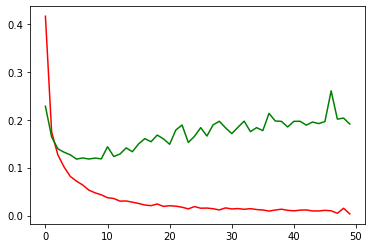

In [38]:
# 학습데이터 로스
plt.plot(history.history['loss'], c='r')
# 검증데이터 로스
plt.plot(history.history['val_loss'], c='g')
plt.show()

In [39]:
# 50회 학습한 모델(정확도 99%)로 테스트데이터 예측
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 1ms/step - loss: 0.1965 - accuracy: 0.9733


[0.1964758038520813, 0.9732999801635742]

### 혼동행렬

In [41]:
from sklearn.metrics import confusion_matrix
import numpy as np

pred = model.predict(test_x)
# 실제:[1,0,1], 예측:[1,0,0]
confusion_matrix(np.argmax(test_y, axis=1), np.argmax(pred, axis=1))

array([[ 968,    0,    0,    0,    2,    1,    4,    3,    2,    0],
       [   0, 1122,    2,    2,    0,    0,    2,    1,    6,    0],
       [   1,    2, 1013,    6,    1,    0,    1,    5,    3,    0],
       [   0,    0,    0,  990,    0,    8,    0,    6,    5,    1],
       [   3,    0,    2,    0,  955,    0,    9,    1,    0,   12],
       [   3,    1,    0,   13,    3,  855,   10,    0,    6,    1],
       [   3,    2,    1,    1,    3,    4,  938,    1,    5,    0],
       [   1,    2,    9,    7,    2,    0,    0,  997,    7,    3],
       [  10,    2,    5,    5,    4,    6,    4,    5,  929,    4],
       [   2,    3,    0,    7,   12,    3,    0,    8,    8,  966]],
      dtype=int64)

### 분류보고서

In [43]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(test_y, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [48]:
np.expand_dims(test_x[0],0)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [45]:
test_y[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [49]:
# 확률값을 출력
model.predict(np.expand_dims(test_x[0],0))

array([[3.2999294e-15, 5.5027601e-15, 1.6231711e-13, 1.7471750e-12,
        2.6111574e-14, 1.9312836e-21, 3.1388645e-20, 1.0000000e+00,
        1.1228649e-14, 2.7692071e-10]], dtype=float32)

In [50]:
# label값으로 출력
model.predict_classes(np.expand_dims(test_x[0],0))

C:\Users\sundooedu\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7], dtype=int64)

In [52]:
!pip install opencv-python

In [53]:
import cv2

In [77]:
img = cv2.imread('2.jpg', cv2.IMREAD_GRAYSCALE)
# 이미지 리사이징
img = cv2.resize(img, None, fx=28/img.shape[1], fy=28/img.shape[0])
img = img/255

In [78]:
img.shape

(28, 28)

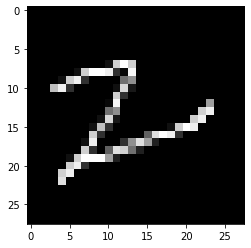

In [79]:
plt.imshow(img,'gray')
plt.show()

In [80]:
img = img.reshape(-1)

In [81]:
img.shape

(784,)

In [82]:
model.predict(np.expand_dims(img,0))

array([[3.8178624e-03, 2.0626435e-07, 1.5564671e-02, 6.7274011e-04,
        7.6886371e-02, 4.8136328e-05, 9.0300661e-01, 1.3913692e-06,
        3.3617778e-07, 1.7172352e-06]], dtype=float32)

In [83]:
model.predict_classes(np.expand_dims(img,0))

array([6], dtype=int64)

In [84]:
test_y[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [87]:
model.predict_classes(np.expand_dims(test_x[1],0))

array([2], dtype=int64)